### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
#           'India': 'Blue', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
#           'Spain': 'yellow',
#           'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
#           'Iran': 'brown', 
          'China': 'red', 
#           'New Zealand': 'lightblue'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,China
2021-05-18,283248,3404338,587219,439050,220746,127953,124497,114619,108201,86671,4846
2021-05-19,287122,3417682,587874,441691,220850,127956,124646,115003,108342,86908,4846
2021-05-20,291331,3430326,588539,444094,221080,127963,124810,115393,108343,87135,4846
2021-05-21,295525,3442873,589223,446309,221256,127972,125028,115764,108343,87303,4846
2021-05-22,299266,3454000,589703,448208,221597,127978,125153,116144,108345,87385,4846


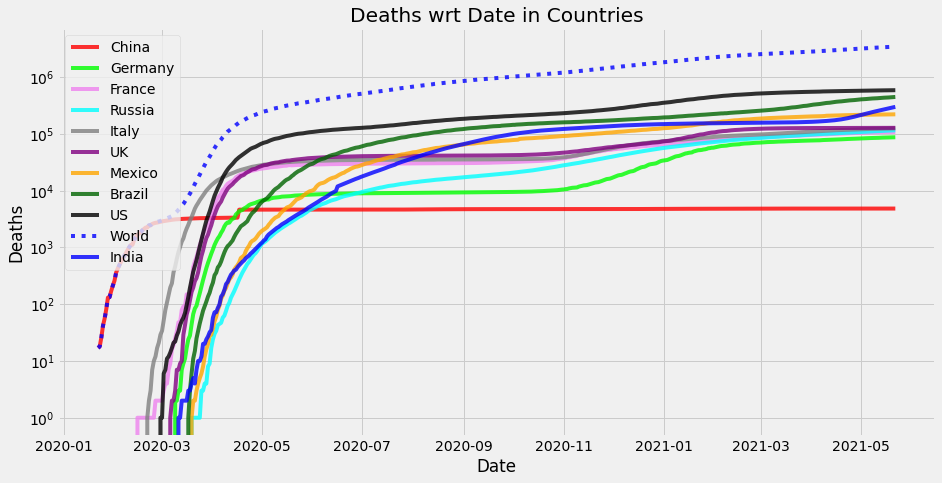

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,China
2021-05-18,267334,622184,27819,75445,2767,-2362,4449,8057,17223,7576,15
2021-05-19,276110,671092,29293,79219,2000,2146,5500,7799,19057,11881,13
2021-05-20,259551,628529,30141,82039,2628,2699,5736,9112,449,10727,25
2021-05-21,257299,607596,28341,76855,2604,2708,5215,8811,270,8096,11
2021-05-22,240842,560116,19778,76490,2586,2524,4714,8585,228,6419,20


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,China
2021-05-18,314406,709638,41623,61171,2646,2061,9436,8475,19356,13020,18
2021-05-19,311853,707068,40801,62375,2603,2066,9173,8430,19336,12944,18
2021-05-20,308366,701832,40090,63685,2605,2109,8944,8476,18077,12796,18
2021-05-21,304962,695550,39307,64563,2605,2148,8696,8498,16890,12483,18
2021-05-22,300687,686521,38005,65358,2604,2173,8430,8504,15779,12078,18


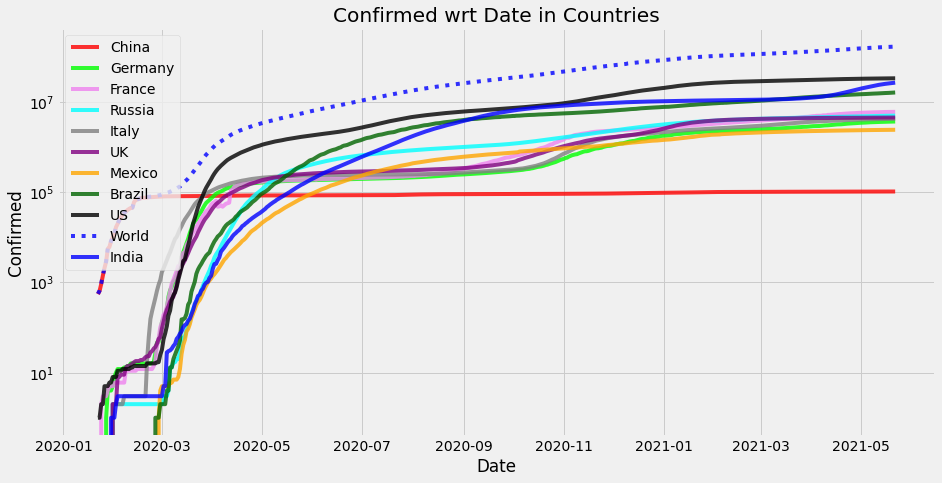

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,China
2021-05-18,4529,14249,760,2513,253,7,201,356,228,285,0
2021-05-19,3874,13344,655,2641,104,3,149,384,141,237,0
2021-05-20,4209,12644,665,2403,230,7,164,390,1,227,0
2021-05-21,4194,12547,684,2215,176,9,218,371,0,168,0
2021-05-22,3741,11127,480,1899,341,6,125,380,2,82,0


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,China
2021-05-18,3967.41,12433.93,594.47,1943.47,217.41,10.37,198.49,356.86,193.19,200.02,0.02
2021-05-19,3955.74,12547.69,602.04,2030.66,203.23,9.45,192.30,360.25,186.67,204.64,0.01
2021-05-20,3987.39,12559.73,609.91,2077.20,206.58,9.15,188.77,363.97,163.46,207.44,0.01
2021-05-21,4013.22,12558.14,619.17,2094.43,202.76,9.13,192.42,364.85,143.03,202.51,0.01
2021-05-22,3979.19,12379.25,601.77,2070.00,220.04,8.74,183.99,366.74,125.40,187.45,0.01


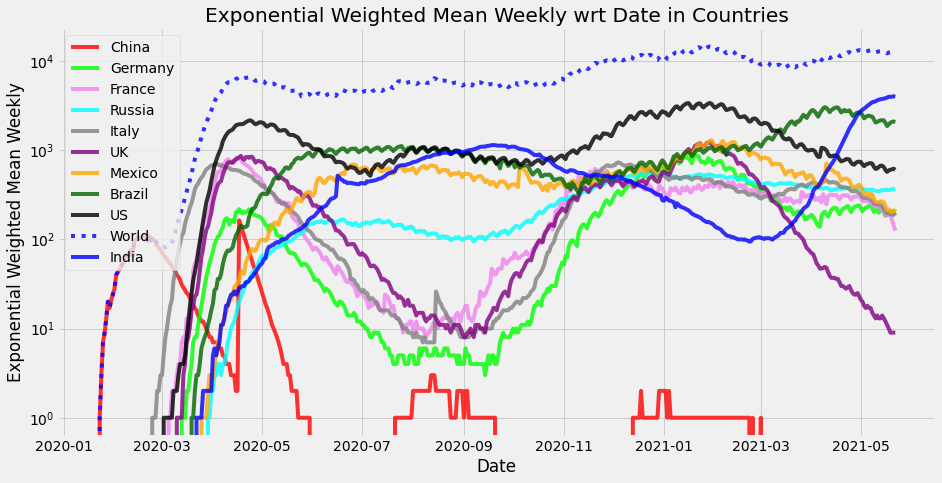

In [18]:
plotter(np.round(AVG), name)

### Stack Plots

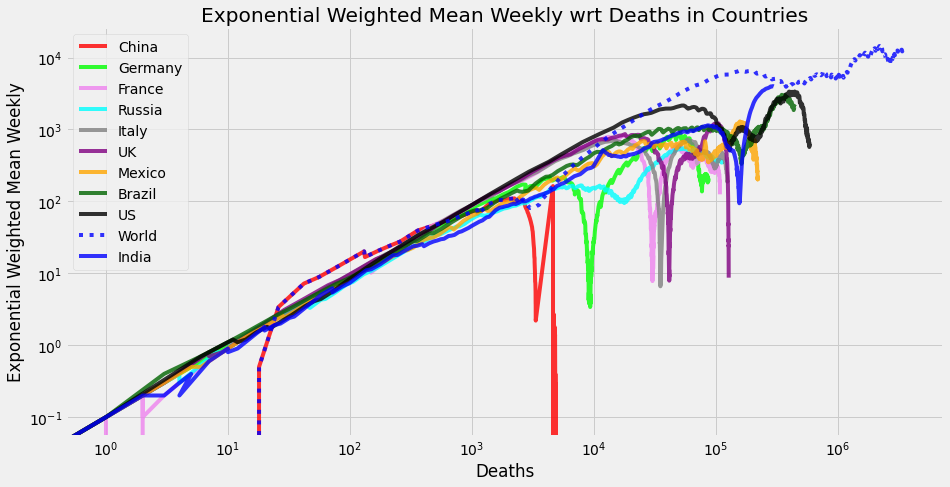

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

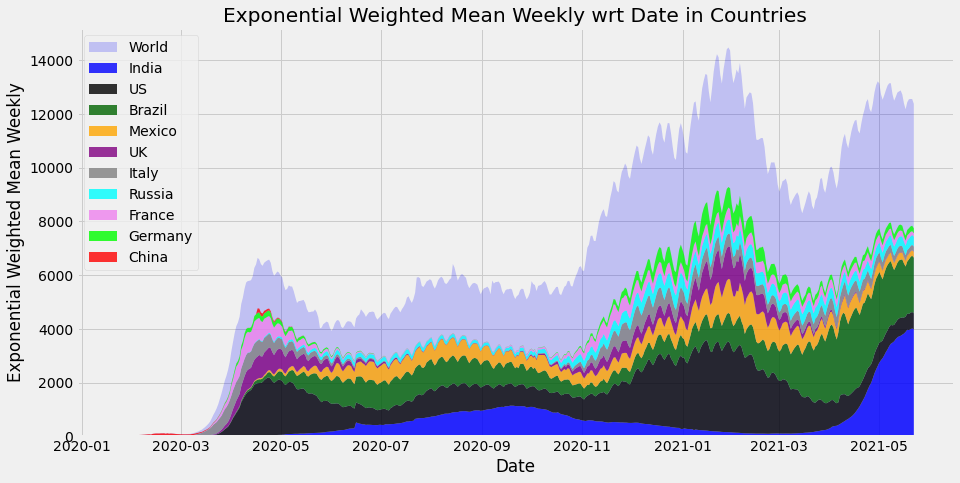

In [20]:
stackplotter(AVG, name)

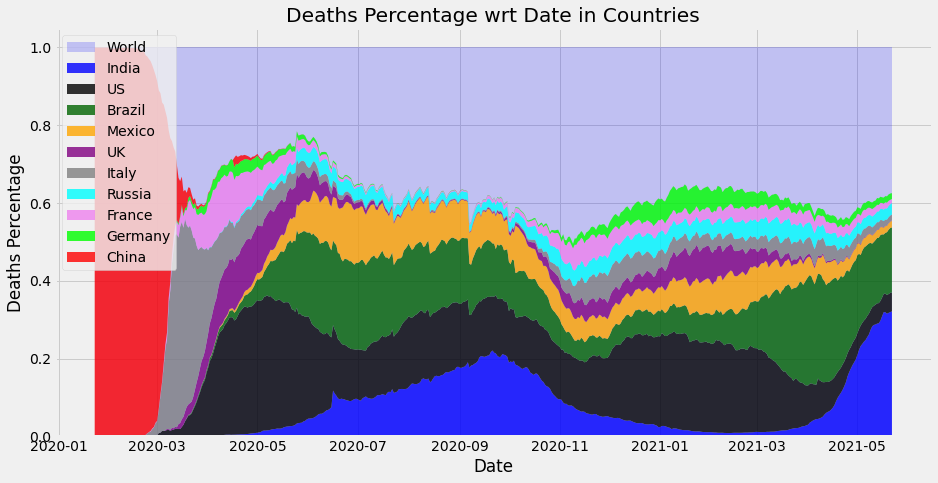

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

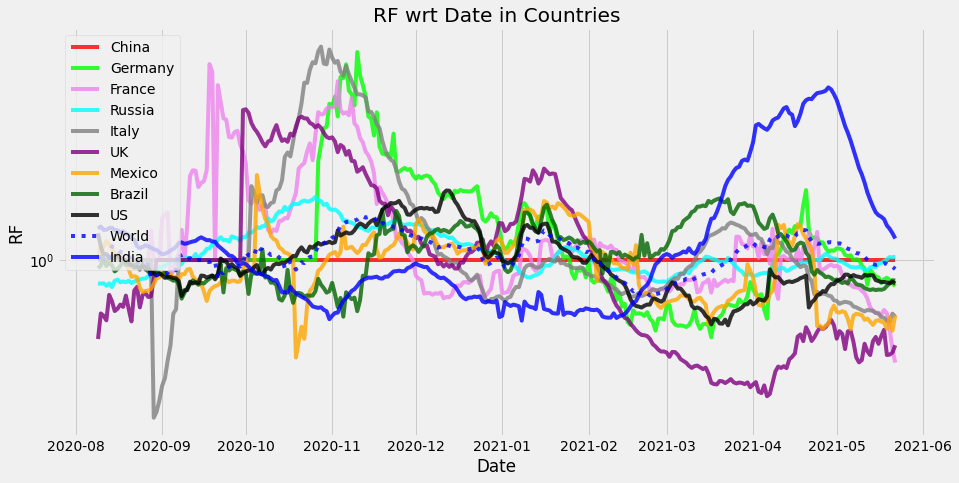

In [23]:
plotter(Reproductivity[200:], 'RF')

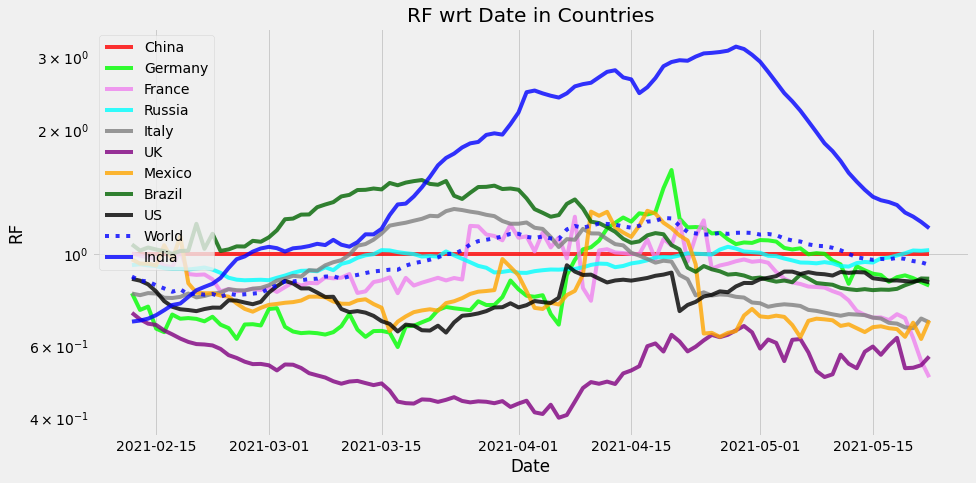

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

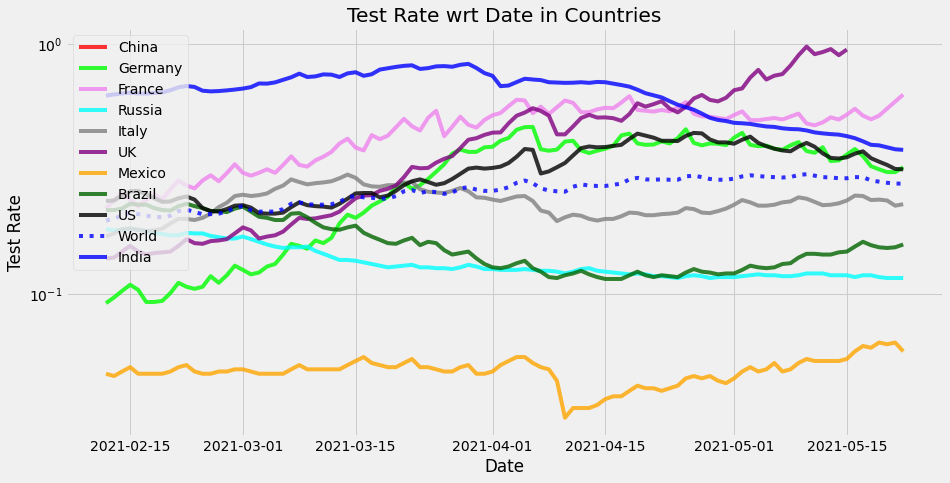

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

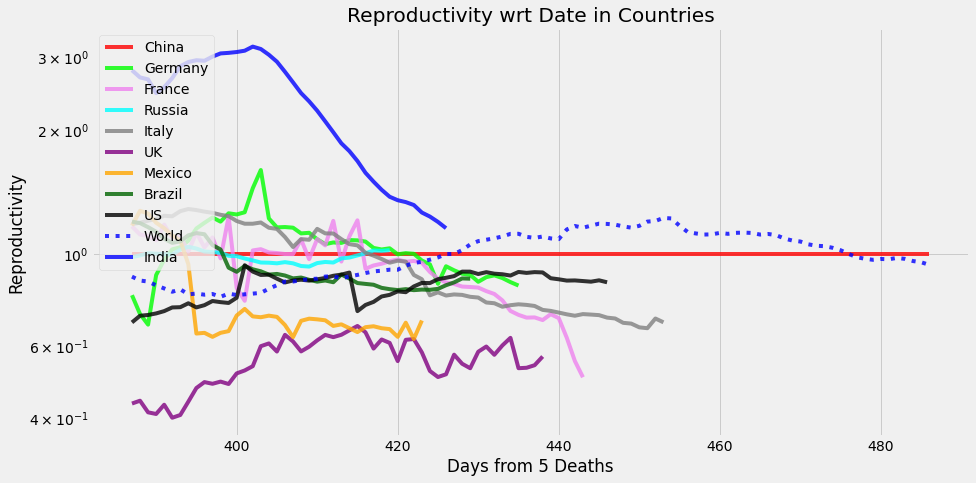

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

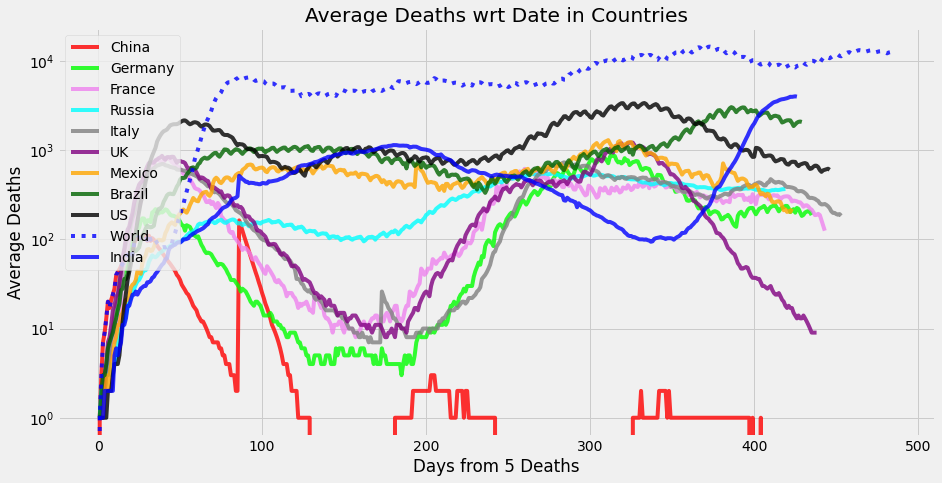

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

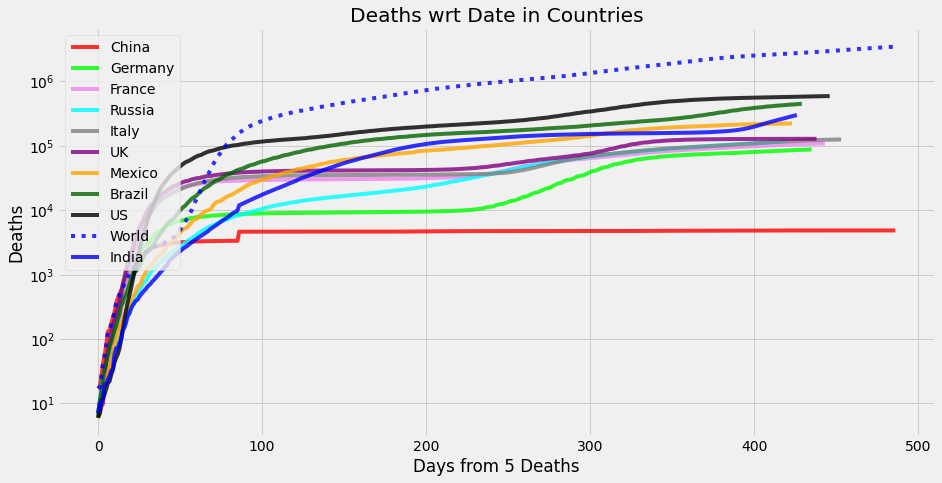

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,3454000,11127,12091.57,12379.25,0.9416,166699143,0.277,686521,690.80
US,589703,480,556.43,601.77,0.8545,33104884,0.316,38005,117.94
Brazil,448208,1899,1927.57,2070.00,0.8718,16047439,0.158,65358,89.64
India,299266,3741,4140.29,3979.19,1.1551,26530132,0.378,300687,59.85
Mexico,221597,341,173.29,220.04,0.6906,2395330,0.059,2604,44.32
UK,127978,6,5.86,8.74,0.5650,4476297,NaN,2173,25.60
Italy,125153,125,155.71,183.99,0.6837,4188190,0.229,8430,25.03
Russia,116144,380,371.86,366.74,1.0222,4935302,0.116,8504,23.23
France,108345,2,92.71,125.40,0.5034,5979597,0.629,15779,21.67


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,3454000,11127,12091.57,12379.25,0.9416,166699143,0.277,686521,690.80
India,299266,3741,4140.29,3979.19,1.1551,26530132,0.378,300687,59.85
Brazil,448208,1899,1927.57,2070.00,0.8718,16047439,0.158,65358,89.64
US,589703,480,556.43,601.77,0.8545,33104884,0.316,38005,117.94
Colombia,84228,509,492.57,485.17,1.0835,3210787,0.163,15810,16.85
Argentina,73688,297,490.71,469.03,1.2047,3514683,0.273,25572,14.74
Russia,116144,380,371.86,366.74,1.0222,4935302,0.116,8504,23.23
Peru,67807,554,314.14,306.15,0.9177,1920851,0.103,6294,13.56
Iran,78381,187,249.71,267.51,0.7511,2823887,0.279,14902,15.68


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  3454000


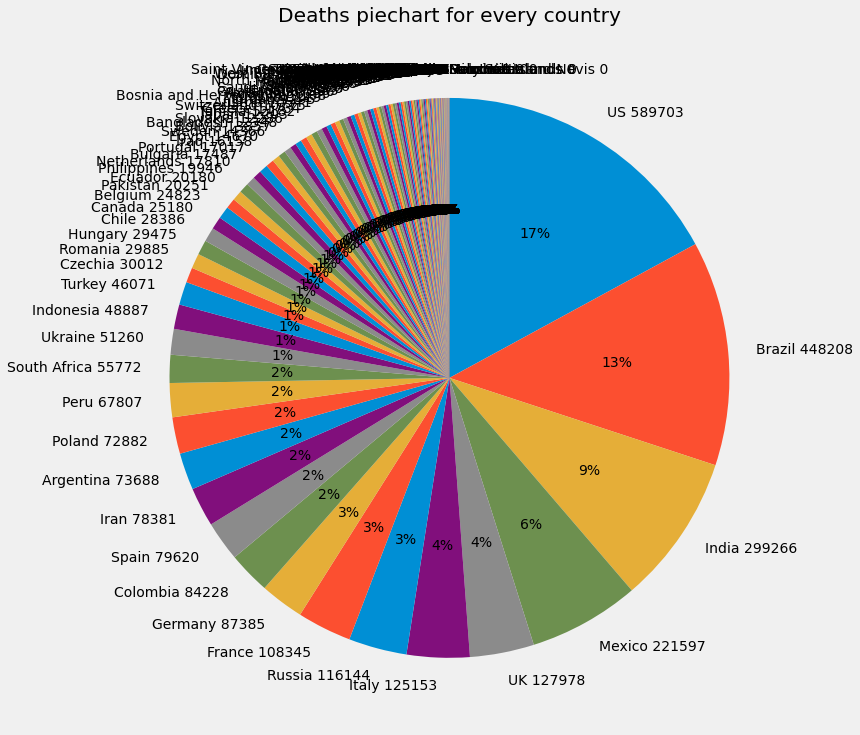

In [35]:
piechart('Deaths')

World total:  12091


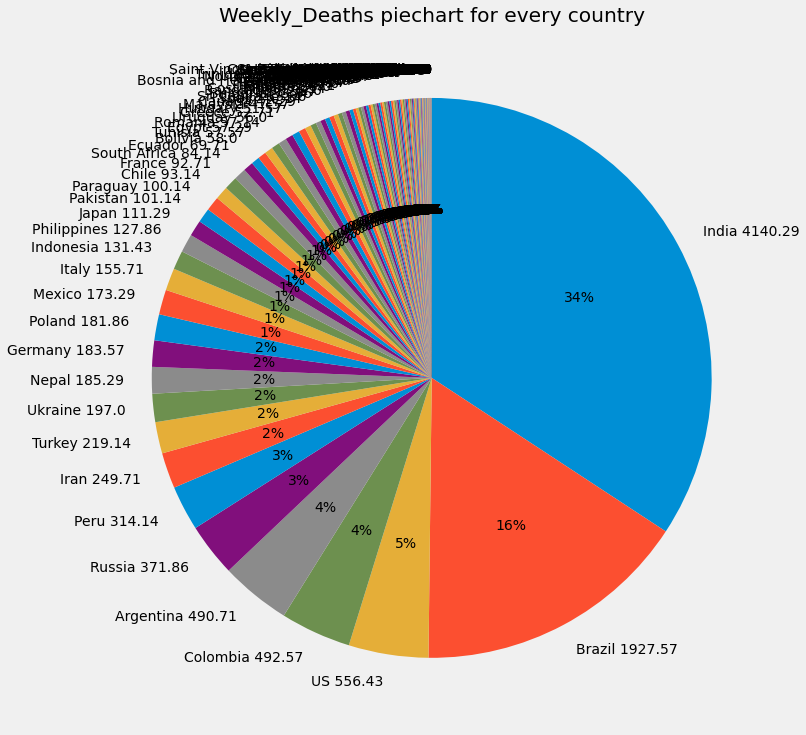

In [36]:
piechart('Weekly_Deaths')

World total:  11127


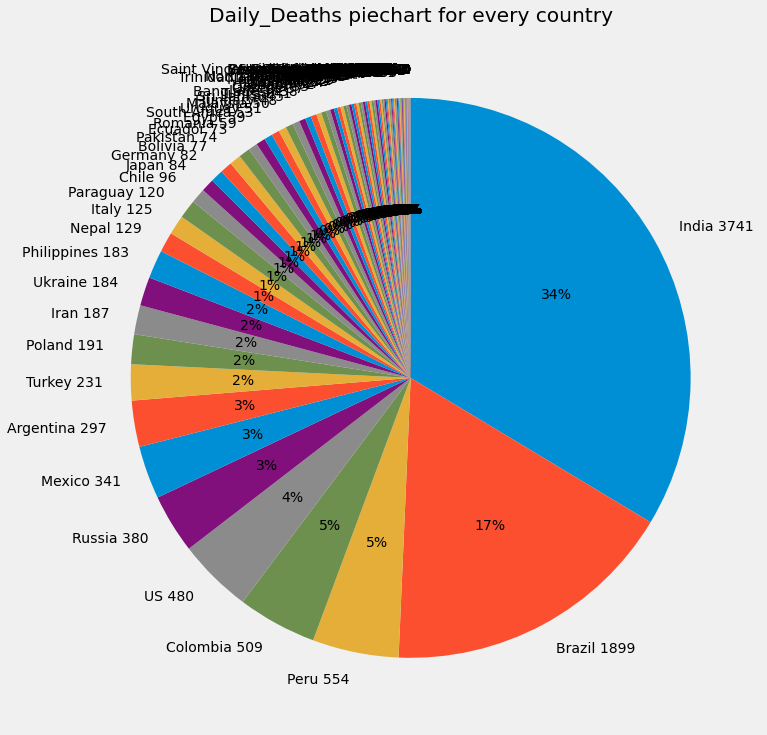

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-05-23


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

690800000.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master 0599577] `date` update
 1 file changed, 1999 insertions(+), 1999 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (71%)


To https://github.com/Arrowheadahp/COVID-19.git
   fe6605d..0599577  master -> master
